# Lab 3

In [46]:
import numpy as np
from scipy.fft import fft, ifft
from matplotlib import pyplot as plt
import math

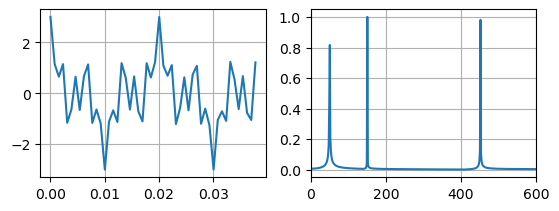

In [3]:
def exercise1() -> None:
    points_count = 900
    max_frequency = 1300

    def signal(x: np.ndarray[np.dtype]) -> np.ndarray[np.dtype]:
        return np.cos(x * 2 * np.pi * 50) + np.cos(x * 2 * np.pi * 150) + np.cos(x * 2 * np.pi * 450)

    period = 1 / max_frequency
    xs = np.linspace(0, points_count * period, points_count)
    ys = signal(xs)

    xs_ff = np.linspace(0, max_frequency / 2, points_count // 2)
    ys_ff = fft(ys)

    limit = 50
    plt.subplot(221)
    plt.plot(xs[0:limit], ys[0:limit])
    plt.grid()

    plt.subplot(222)
    plt.plot(xs_ff, 2 / points_count * np.abs(ys_ff[0:points_count // 2]))
    plt.xlim(0, 600)
    plt.grid()

    plt.show()


exercise1()

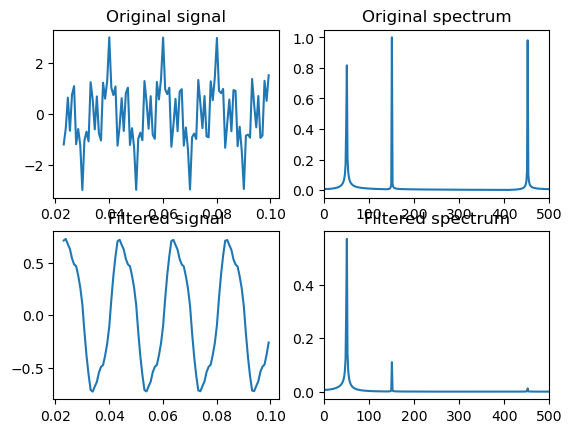

In [32]:
def exercise2() -> None:
    points_count = 900
    max_frequency = 1300

    def signal(x: np.ndarray[np.dtype]) -> np.ndarray[np.dtype]:
        return np.cos(x * 2 * np.pi * 50) + np.cos(x * 2 * np.pi * 150) + np.cos(x * 2 * np.pi * 450)

    w_cut = 50

    period = 1 / max_frequency

    def butterworth_filter(w: float) -> float:
        omega = w / w_cut
        denominator = -(omega ** 2) + 1j * np.sqrt(2) * omega + 1
        return 1 / denominator

    xs = np.linspace(0.0, points_count * period, points_count)
    ys = signal(xs)

    xs_f = np.linspace(0.0, max_frequency / 2, points_count // 2)
    ys_f = fft(ys)
    ys_filtered = np.zeros_like(ys_f)
    for i in range(len(ys_filtered)):
        ys_filtered[i] = ys_f[i] * butterworth_filter(i * max_frequency / points_count)

    signal_points_to_show = 100
    l = 30
    r = l + signal_points_to_show

    plt.subplot(221)
    plt.title('Original signal')
    plt.plot(xs[l:r], ys[l:r])

    plt.subplot(222)
    plt.plot(xs_f, 2.0 / points_count * np.abs(ys_f[0:points_count // 2]))
    plt.title('Original spectrum')
    plt.xlim(0, 500)

    plt.subplot(223)
    plt.title('Filtered signal')
    plt.plot(xs[l:r], 2.0 * np.real(ifft(ys_filtered))[l:r])

    plt.subplot(224)
    plt.plot(xs_f, 2.0 / points_count * np.abs(ys_filtered[0:points_count // 2]))
    plt.title('Filtered spectrum')
    plt.xlim(0, 500)

    plt.show()


exercise2()

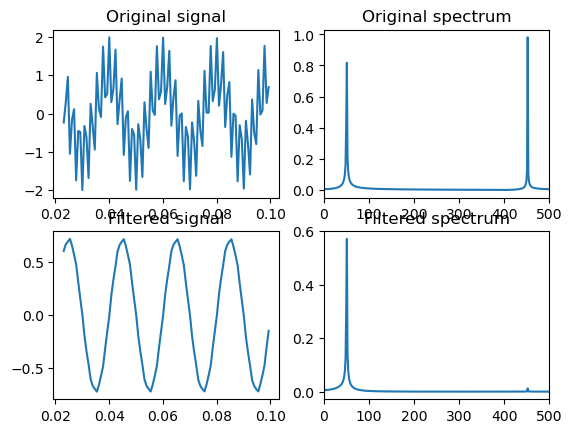

In [40]:
def exercise3() -> None:
    points_count = 900
    max_frequency = 1300

    def signal(x: np.ndarray[np.dtype]) -> np.ndarray[np.dtype]:
        return np.cos(x * 2 * np.pi * 50) + np.cos(x * 2 * np.pi * 450)

    w_cut = 50

    period = 1 / max_frequency

    def butterworth_filter(w: float) -> float:
        omega = w / w_cut
        denominator = -(omega ** 2) + 1j * np.sqrt(2) * omega + 1
        return 1 / denominator

    xs = np.linspace(0.0, points_count * period, points_count)
    ys = signal(xs)

    xs_f = np.linspace(0.0, max_frequency / 2, points_count // 2)
    ys_f = fft(ys)
    ys_filtered = np.zeros_like(ys_f)
    for i in range(len(ys_filtered)):
        ys_filtered[i] = ys_f[i] * butterworth_filter(i * max_frequency / points_count)

    signal_points_to_show = 100
    l = 30
    r = l + signal_points_to_show

    plt.subplot(221)
    plt.title('Original signal')
    plt.plot(xs[l:r], ys[l:r])

    plt.subplot(222)
    plt.plot(xs_f, 2.0 / points_count * np.abs(ys_f[0:points_count // 2]))
    plt.title('Original spectrum')
    plt.xlim(0, 500)

    plt.subplot(223)
    plt.title('Filtered signal')
    plt.plot(xs[l:r], 2.0 * np.real(ifft(ys_filtered))[l:r])

    plt.subplot(224)
    plt.plot(xs_f, 2.0 / points_count * np.abs(ys_filtered[0:points_count // 2]))
    plt.title('Filtered spectrum')
    plt.xlim(0, 500)

    plt.show()


exercise3()

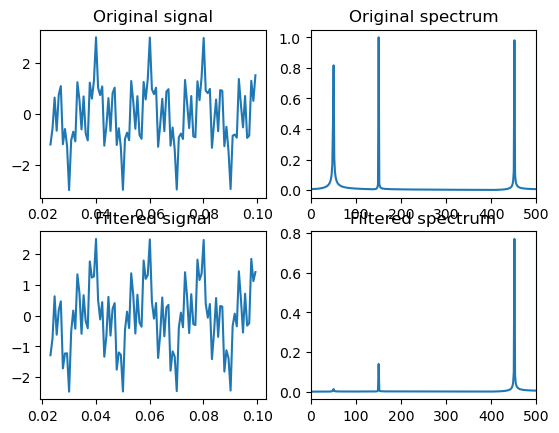

In [41]:
def exercise4() -> None:
    points_count = 900
    max_frequency = 1300

    def signal(x: np.ndarray[np.dtype]) -> np.ndarray[np.dtype]:
        return np.cos(x * 2 * np.pi * 50) + np.cos(x * 2 * np.pi * 150) + np.cos(x * 2 * np.pi * 450)

    w_cut = 400

    div_by_zero_shift = 1e-10

    period = 1 / max_frequency

    def butterworth_filter(w: float) -> float:
        omega = w_cut / (w + div_by_zero_shift)
        denominator = -(omega ** 2) + 1j * np.sqrt(2) * omega + 1
        return 1 / denominator

    xs = np.linspace(0.0, points_count * period, points_count)
    ys = signal(xs)

    xs_f = np.linspace(0.0, max_frequency / 2, points_count // 2)
    ys_f = fft(ys)
    ys_filtered = np.zeros_like(ys_f)
    for i in range(len(ys_filtered)):
        ys_filtered[i] = ys_f[i] * butterworth_filter(i * max_frequency / points_count)

    signal_points_to_show = 100
    l = 30
    r = l + signal_points_to_show

    plt.subplot(221)
    plt.title('Original signal')
    plt.plot(xs[l:r], ys[l:r])

    plt.subplot(222)
    plt.plot(xs_f, 2.0 / points_count * np.abs(ys_f[0:points_count // 2]))
    plt.title('Original spectrum')
    plt.xlim(0, 500)

    plt.subplot(223)
    plt.title('Filtered signal')
    plt.plot(xs[l:r], 2.0 * np.real(ifft(ys_filtered))[l:r])

    plt.subplot(224)
    plt.plot(xs_f, 2.0 / points_count * np.abs(ys_filtered[0:points_count // 2]))
    plt.title('Filtered spectrum')
    plt.xlim(0, 500)

    plt.show()


exercise4()

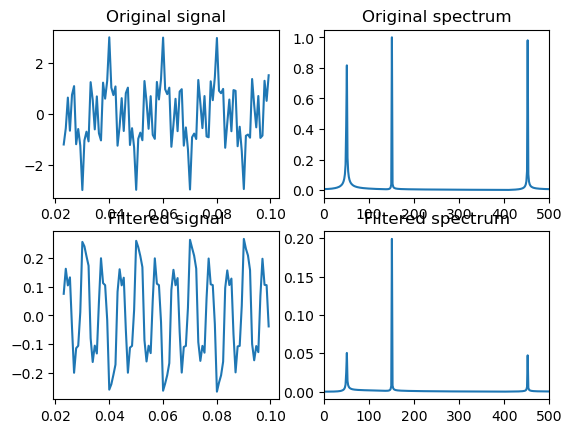

In [44]:
def exercise5() -> None:
    points_count = 900
    max_frequency = 1300

    def signal(x: np.ndarray[np.dtype]) -> np.ndarray[np.dtype]:
        return np.cos(x * 2 * np.pi * 50) + np.cos(x * 2 * np.pi * 150) + np.cos(x * 2 * np.pi * 450)

    w_cut_low = 100
    w_cut_high = 200

    div_by_zero_shift = 1e-10

    period = 1 / max_frequency

    def butterworth_filter(w: float) -> float:
        omega_low = w / w_cut_low
        omega_high = w_cut_high / (w + div_by_zero_shift)
        denominator_low = -(omega_low ** 2) + 1j * np.sqrt(2) * omega_low + 1
        denominator_high = -(omega_high ** 2) + 1j * np.sqrt(2) * omega_high + 1
        return 1 / denominator_low / denominator_high

    xs = np.linspace(0.0, points_count * period, points_count)
    ys = signal(xs)

    xs_f = np.linspace(0.0, max_frequency / 2, points_count // 2)
    ys_f = fft(ys)
    ys_filtered = np.zeros_like(ys_f)
    for i in range(len(ys_filtered)):
        ys_filtered[i] = ys_f[i] * butterworth_filter(i * max_frequency / points_count)

    signal_points_to_show = 100
    l = 30
    r = l + signal_points_to_show

    plt.subplot(221)
    plt.title('Original signal')
    plt.plot(xs[l:r], ys[l:r])

    plt.subplot(222)
    plt.plot(xs_f, 2.0 / points_count * np.abs(ys_f[0:points_count // 2]))
    plt.title('Original spectrum')
    plt.xlim(0, 500)

    plt.subplot(223)
    plt.title('Filtered signal')
    plt.plot(xs[l:r], 2.0 * np.real(ifft(ys_filtered))[l:r])

    plt.subplot(224)
    plt.plot(xs_f, 2.0 / points_count * np.abs(ys_filtered[0:points_count // 2]))
    plt.title('Filtered spectrum')
    plt.xlim(0, 500)

    plt.show()


exercise5()

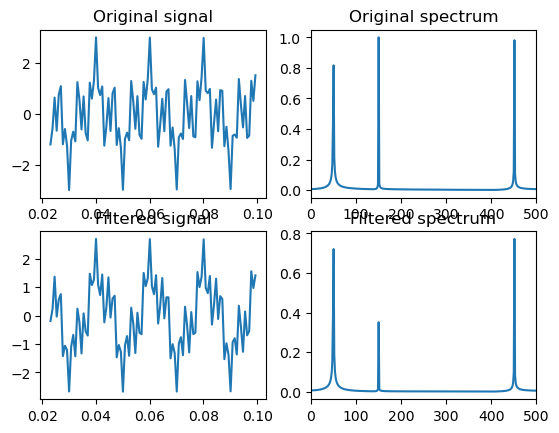

In [59]:
def exercise5_2() -> None:
    points_count = 900
    max_frequency = 1300

    def signal(x: np.ndarray[np.dtype]) -> np.ndarray[np.dtype]:
        return np.cos(x * 2 * np.pi * 50) + np.cos(x * 2 * np.pi * 150) + np.cos(x * 2 * np.pi * 450)

    w_cut_low = 70
    w_cut_high = 400

    div_by_zero_shift = 1e-10

    period = 1 / max_frequency

    def butterworth_filter(w: float) -> float:
        omega_low = w / w_cut_low
        omega_high = w_cut_high / (w + div_by_zero_shift)
        denominator_low = -(omega_low ** 2) + 1j * np.sqrt(2) * omega_low + 1
        denominator_high = -(omega_high ** 2) + 1j * np.sqrt(2) * omega_high + 1
        return 1 / denominator_low  + 1 / denominator_high

    xs = np.linspace(0.0, points_count * period, points_count)
    ys = signal(xs)

    xs_f = np.linspace(0.0, max_frequency / 2, points_count // 2)
    ys_f = fft(ys)
    ys_filtered = np.zeros_like(ys_f)
    for i in range(len(ys_filtered)):
        ys_filtered[i] = ys_f[i] * butterworth_filter(i * max_frequency / points_count)

    signal_points_to_show = 100
    l = 30
    r = l + signal_points_to_show

    plt.subplot(221)
    plt.title('Original signal')
    plt.plot(xs[l:r], ys[l:r])

    plt.subplot(222)
    plt.plot(xs_f, 2.0 / points_count * np.abs(ys_f[0:points_count // 2]))
    plt.title('Original spectrum')
    plt.xlim(0, 500)

    plt.subplot(223)
    plt.title('Filtered signal')
    plt.plot(xs[l:r], 2.0 * np.real(ifft(ys_filtered))[l:r])

    plt.subplot(224)
    plt.plot(xs_f, 2.0 / points_count * np.abs(ys_filtered[0:points_count // 2]))
    plt.title('Filtered spectrum')
    plt.xlim(0, 500)

    plt.show()


exercise5_2()

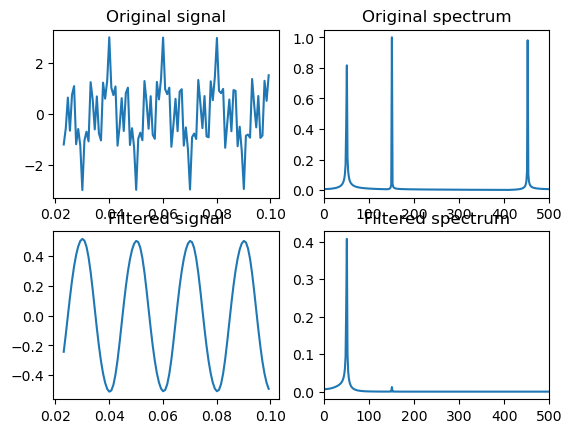

In [48]:
def exercise6() -> None:
    points_count = 900
    max_frequency = 1300

    def signal(x: np.ndarray[np.dtype]) -> np.ndarray[np.dtype]:
        return np.cos(x * 2 * np.pi * 50) + np.cos(x * 2 * np.pi * 150) + np.cos(x * 2 * np.pi * 450)

    w_cut = 50

    period = 1 / max_frequency

    negative_roots = list(
        filter(lambda x: x.real < 0, np.roots([(-1) ** points_count] + [0] * (points_count * 2 - 1) + [1])))[:4]

    def butterworth_filter(w: float) -> float:
        omega = w / w_cut
        terms = [omega * 1j - root for root in negative_roots]
        return 1 / math.prod(terms)

    xs = np.linspace(0.0, points_count * period, points_count)
    ys = signal(xs)

    xs_f = np.linspace(0.0, max_frequency / 2, points_count // 2)
    ys_f = fft(ys)
    ys_filtered = np.zeros_like(ys_f)
    for i in range(len(ys_filtered)):
        ys_filtered[i] = ys_f[i] * butterworth_filter(i * max_frequency / points_count)

    signal_points_to_show = 100
    l = 30
    r = l + signal_points_to_show

    plt.subplot(221)
    plt.title('Original signal')
    plt.plot(xs[l:r], ys[l:r])

    plt.subplot(222)
    plt.plot(xs_f, 2.0 / points_count * np.abs(ys_f[0:points_count // 2]))
    plt.title('Original spectrum')
    plt.xlim(0, 500)

    plt.subplot(223)
    plt.title('Filtered signal')
    plt.plot(xs[l:r], 2.0 * np.real(ifft(ys_filtered))[l:r])

    plt.subplot(224)
    plt.plot(xs_f, 2.0 / points_count * np.abs(ys_filtered[0:points_count // 2]))
    plt.title('Filtered spectrum')
    plt.xlim(0, 500)

    plt.show()


exercise6()

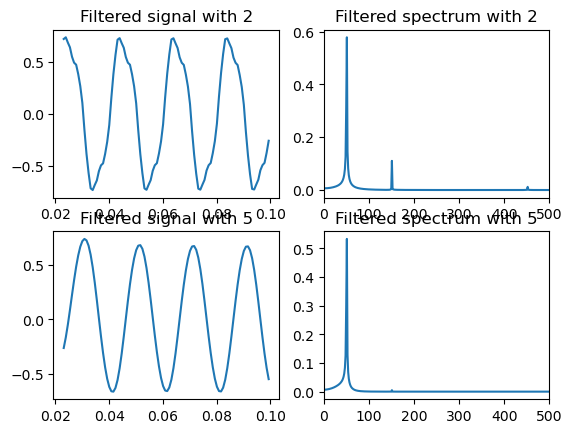

In [51]:
def exercise7() -> None:
    points_count = 900
    max_frequency = 1300

    def signal(x: np.ndarray[np.dtype]) -> np.ndarray[np.dtype]:
        return np.cos(x * 2 * np.pi * 50) + np.cos(x * 2 * np.pi * 150) + np.cos(x * 2 * np.pi * 450)

    w_cut = 50

    period = 1 / max_frequency

    negative_roots = list(
        filter(lambda x: x.real < 0, np.roots([(-1) ** points_count] + [0] * (points_count * 2 - 1) + [1])))[:5]

    def butterworth_filter_2(w: float) -> float:
        omega = w / w_cut
        terms = [omega * 1j - root for root in negative_roots[:2]]
        return 1 / math.prod(terms)

    def butterworth_filter_5(w: float) -> float:
        omega = w / w_cut
        terms = [omega * 1j - root for root in negative_roots]
        return 1 / math.prod(terms)

    xs = np.linspace(0.0, points_count * period, points_count)
    ys = signal(xs)

    xs_f = np.linspace(0.0, max_frequency / 2, points_count // 2)
    ys_f = fft(ys)

    ys_filtered_2 = np.zeros_like(ys_f)
    for i in range(len(ys_filtered_2)):
        ys_filtered_2[i] = ys_f[i] * butterworth_filter_2(i * max_frequency / points_count)

    ys_filtered_5 = np.zeros_like(ys_f)
    for i in range(len(ys_filtered_5)):
        ys_filtered_5[i] = ys_f[i] * butterworth_filter_5(i * max_frequency / points_count)

    signal_points_to_show = 100
    l = 30
    r = l + signal_points_to_show

    plt.subplot(221)
    plt.title('Filtered signal with 2')
    plt.plot(xs[l:r], 2.0 * np.real(ifft(ys_filtered_2))[l:r])

    plt.subplot(222)
    plt.plot(xs_f, 2.0 / points_count * np.abs(ys_filtered_2[0:points_count // 2]))
    plt.title('Filtered spectrum with 2')
    plt.xlim(0, 500)

    plt.subplot(223)
    plt.title('Filtered signal with 5')
    plt.plot(xs[l:r], 2.0 * np.real(ifft(ys_filtered_5))[l:r])

    plt.subplot(224)
    plt.plot(xs_f, 2.0 / points_count * np.abs(ys_filtered_5[0:points_count // 2]))
    plt.title('Filtered spectrum with 5')
    plt.xlim(0, 500)

    plt.show()


exercise7()

In [10]:
def exercise8() -> None:
    pass


exercise8()

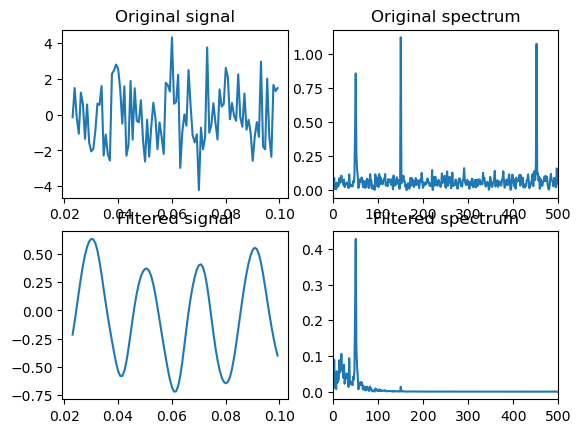

In [49]:
def exercise9() -> None:
    points_count = 900
    max_frequency = 1300

    def signal(x: np.ndarray[np.dtype]) -> np.ndarray[np.dtype]:
        return np.cos(x * 2 * np.pi * 50) + np.cos(x * 2 * np.pi * 150) + np.cos(x * 2 * np.pi * 450)

    w_cut = 50

    period = 1 / max_frequency

    negative_roots = list(
        filter(lambda x: x.real < 0, np.roots([(-1) ** points_count] + [0] * (points_count * 2 - 1) + [1])))[:4]

    def butterworth_filter(w: float) -> float:
        omega = w / w_cut
        terms = [omega * 1j - root for root in negative_roots]
        return 1 / math.prod(terms)

    noise = np.random.normal(0, 1, points_count)

    xs = np.linspace(0.0, points_count * period, points_count)
    ys = signal(xs) + noise

    xs_f = np.linspace(0.0, max_frequency / 2, points_count // 2)
    ys_f = fft(ys)
    ys_filtered = np.zeros_like(ys_f)
    for i in range(len(ys_filtered)):
        ys_filtered[i] = ys_f[i] * butterworth_filter(i * max_frequency / points_count)

    signal_points_to_show = 100
    l = 30
    r = l + signal_points_to_show

    plt.subplot(221)
    plt.title('Original signal')
    plt.plot(xs[l:r], ys[l:r])

    plt.subplot(222)
    plt.plot(xs_f, 2.0 / points_count * np.abs(ys_f[0:points_count // 2]))
    plt.title('Original spectrum')
    plt.xlim(0, 500)

    plt.subplot(223)
    plt.title('Filtered signal')
    plt.plot(xs[l:r], 2.0 * np.real(ifft(ys_filtered))[l:r])

    plt.subplot(224)
    plt.plot(xs_f, 2.0 / points_count * np.abs(ys_filtered[0:points_count // 2]))
    plt.title('Filtered spectrum')
    plt.xlim(0, 500)

    plt.show()


exercise9()